In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path='/content/creditcard.csv'
df=pd.read_csv(file_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
missing_values=df.isnull().sum()
print(missing_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
#we'll check range of 'amount'

In [ ]:
amount_range=df['Amount'].describe()
print(amount_range)

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


In [ ]:
#lets check no. of fraud and non fraud transaction
transaction_count=df['Class'].value_counts()
print(transaction_count)

Class
0    284315
1       492
Name: count, dtype: int64


<ipython-input-27-f79ed199272c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='coolwarm')


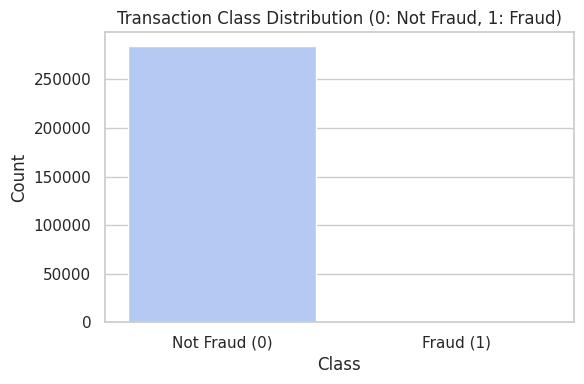

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='coolwarm')
plt.title('Transaction Class Distribution (0: Not Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
plt.tight_layout()
plt.show()

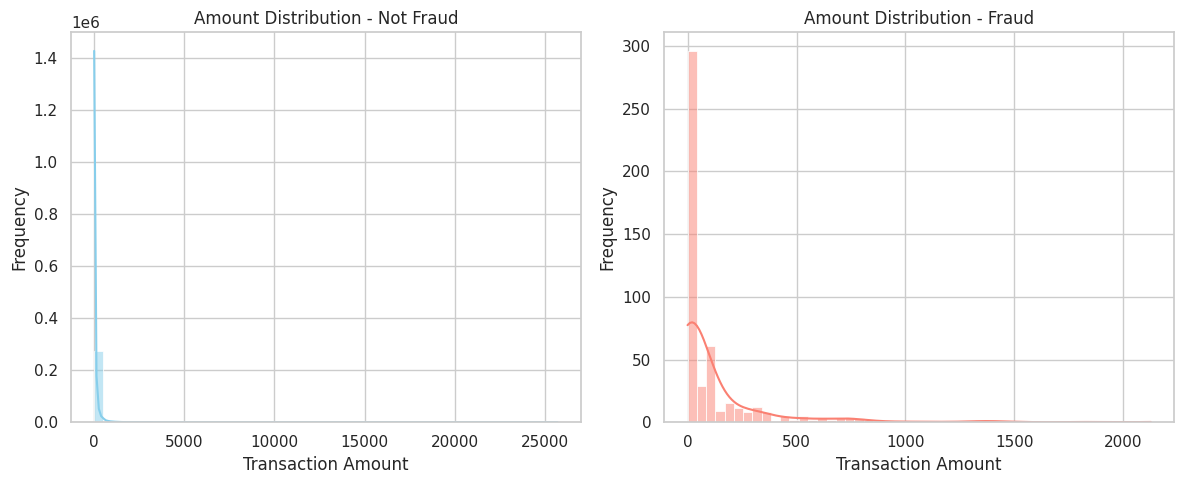

In [ ]:
# Plot distribution of transaction amounts for both classes
plt.figure(figsize=(12, 5))

# Not Fraud
plt.subplot(1, 2, 1)
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color='skyblue', kde=True)
plt.title('Amount Distribution - Not Fraud')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

# Fraud
plt.subplot(1, 2, 2)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='salmon', kde=True)
plt.title('Amount Distribution - Fraud')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


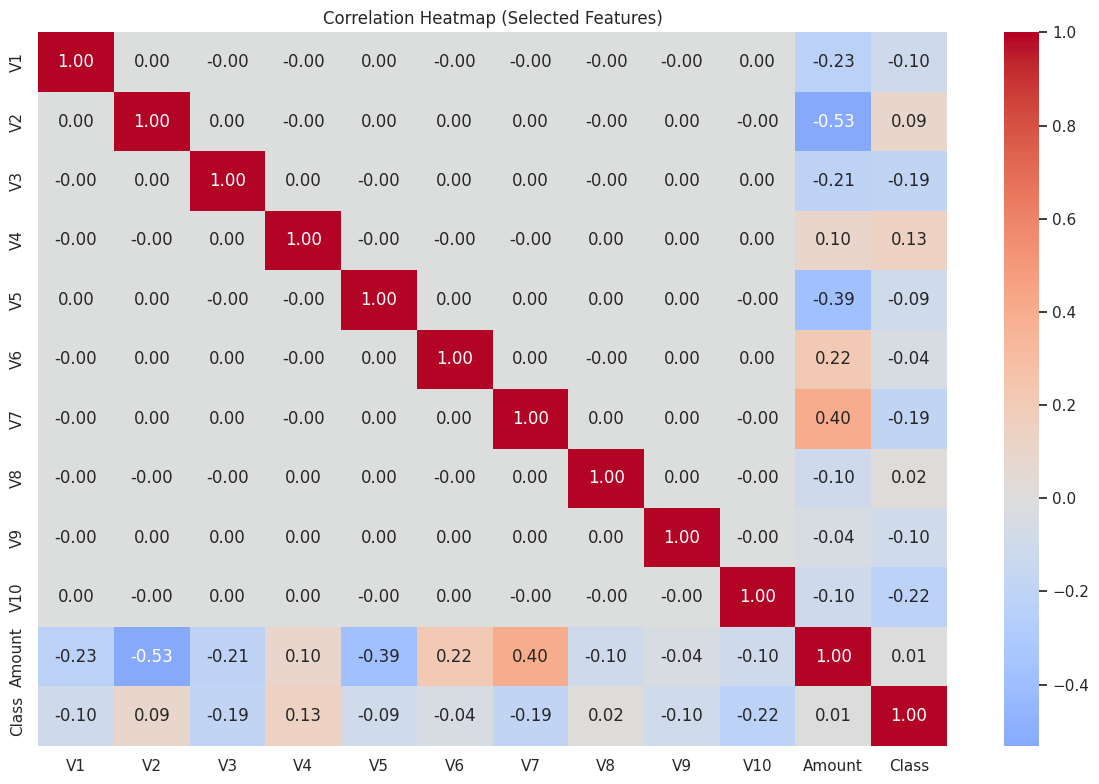

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = df.corr()

# Select columns for readability
selected_columns = ['V'+str(i) for i in range(1, 11)] + ['Amount', 'Class']

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.loc[selected_columns, selected_columns],
            annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (Selected Features)')
plt.tight_layout()
plt.show()


when V2 increases, it’s less likely to be fraud.
higher V7 values might be linked with fraud cases.
Most values are near zero, which means features are pretty independent – good for ML models!

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Dropping the 'Time' column
df = df.drop(['Time'], axis=1)

#Scale the 'Amount' column because raw transaction amount varies alot and this might confuse some ML models
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])


Standardscalar= used to standardize data by removing the mean and scaling to unit variance. This means that the data is transformed so that it has a mean of 0 and a standard deviation of 1, ensuring all features are on a similar scale

In [ ]:
#Split into features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']


In [ ]:
X.isnull().sum() #checking null values (NaN)


,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [ ]:
X=X.fillna(0) #filling NaN values with 0

using x.fillna(0) instead of x.dropna() to maintain consistency between number of rows in X and in Y

In [ ]:
X.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [ ]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#info
X_train.shape, X_test.shape, y_train.value_counts(), y_test.value_counts()


((227845, 29),
 (56962, 29),
 Class
 0    227451
 1       394
 Name: count, dtype: int64,
 Class
 0    56864
 1       98
 Name: count, dtype: int64)

stratisfy:This keeps the same ratio of fraud/non-fraud in both train and test sets. Super important in imbalanced datasets like ours!


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(report)


Confusion Matrix:
[[56851    13]
 [   35    63]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



Overall accuracy is ~100%, BUT that’s kinda misleading here… 🙃

Because fraud is so rare

That’s why recall for fraud (Class 1) is SUPER important.

Retraining the model by using balanced data after using SMOTE(as our dataset is highly imbalanced where frauds are very rare/less)

In [24]:
!pip install imbalanced-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load data
df = pd.read_csv("creditcard.csv")




In [25]:
# Dropping the 'Time' column
df = df.drop(['Time'], axis=1)

In [26]:
# Features and labels
X = df.drop("Class", axis=1)
y = df["Class"]

In [27]:
y.isnull().sum()

np.int64(0)

In [28]:

# Scale 'Amount'
scaler = StandardScaler()
X["Amount"] = scaler.fit_transform(X[["Amount"]])



In [29]:
y.dropna()

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [30]:
y.fillna(0)


,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [31]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Check class distribution
print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_train_sm.value_counts())

Before SMOTE:
 Class
0    227451
1       394
Name: count, dtype: int64

After SMOTE:
 Class
0    227451
1    227451
Name: count, dtype: int64


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Retrain model on SMOTE balanced data
lr_sm = LogisticRegression(max_iter=1000, random_state=42)
lr_sm.fit(X_train_sm, y_train_sm)

# Make predictions on the original test set (unchanged!)
y_pred_sm = lr_sm.predict(X_test)

# Evaluate performance
cm_sm = confusion_matrix(y_test, y_pred_sm)
cr_sm = classification_report(y_test, y_pred_sm)

print("Confusion Matrix:\n", cm_sm)
print("\nClassification Report:\n", cr_sm)


Confusion Matrix:
 [[55355  1509]
 [    8    90]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962



model now catches 91%(recall) of frauds, compared to 64% before! That’s a big win in fraud detection, where missing a fraud is worse than a false alarm

Precision dropped:model says "fraud!" more often, even when it’s not. But in fraud detection, this is usually okay – better safe than sorry!

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Train Random Forest on SMOTE data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_sm, y_train_sm)

# Predict on original test set
y_pred_rf = rf.predict(X_test)

# Evaluate
cm_rf = confusion_matrix(y_test, y_pred_rf)
cr_rf = classification_report(y_test, y_pred_rf)

print("Confusion Matrix:\n", cm_rf)
print("\nClassification Report:\n", cr_rf)


Confusion Matrix:
 [[56852    12]
 [   17    81]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



True Positives (TP): 81 Fraud transactions correctly caught

False Positives (FP): 12  Normal transactions wrongly flagged as fraud

False Negatives (FN): 17 Frauds that slipped through

True Negatives (TN): 56847 Normals correctly identified

much improved results than Logistic regression (fewer frauds are missed)

**LETS TRY XGBOOST algo also**

In [34]:
!pip install xgboost


In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Creating XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train on balanced data
xgb.fit(X_train_sm, y_train_sm)

y_pred_xgb = xgb.predict(X_test)


cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cr_xgb = classification_report(y_test, y_pred_xgb)

print("Confusion Matrix:\n", cm_xgb)
print("\nClassification Report:\n", cr_xgb)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:53:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
 [[56825    39]
 [   13    85]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.69      0.87      0.77        98

    accuracy                           1.00     56962
   macro avg       0.84      0.93      0.88     56962
weighted avg       1.00      1.00      1.00     56962



XGBoost gave the highest recall, which is super important in fraud detection because missing a fraud is worse than a false alarm!
Recall:out of real frauds how many did the model found(accurately predicted)


<Figure size 1200x600 with 0 Axes>

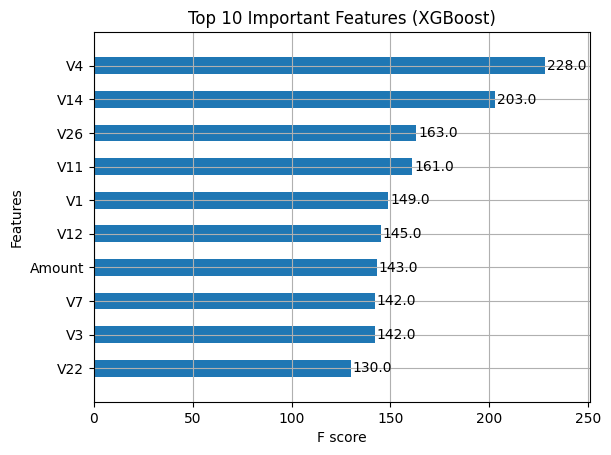

In [36]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(12, 6))
plot_importance(xgb, max_num_features=10, importance_type='weight', height=0.5)
plt.title("Top 10 Important Features (XGBoost)")
plt.show()


The plot displays the top 10 features contributing the most to your XGBoost model's predictions, ranked by their importance or weight.

In [37]:
pip install imbalanced-learn


In [38]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

xgb_base = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_random = RandomizedSearchCV(xgb_base, param_distributions=params,
                                scoring='f1', n_iter=20, cv=3, verbose=2, n_jobs=-1)

xgb_random.fit(X_train_sm, y_train_sm)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:14:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   scoring='f1', verbose=2)

In [39]:
best_xgb = xgb_random.best_estimator_
y_pred_best = best_xgb.predict(X_test)

print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.86      0.82        98

    accuracy                           1.00     56962
   macro avg       0.89      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [41]:
import joblib

# Save the tuned model
joblib.dump(best_xgb, "xgboost_fraud_model.pkl")
print("Model saved as xgboost_fraud_model.pkl")


Model saved as xgboost_fraud_model.pkl
